# K means project

In [22]:
import logging
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder
)
from sklearn.pipeline import Pipeline
from sklearn.decomposition import (
    PCA,
    FastICA
)
from sklearn.metrics import(
    accuracy_score,
    f1_score
)
from sklearn.tree import (
    DecisionTreeClassifier,
    plot_tree
)
from sklearn.cluster import KMeans
from sklearn.manifold import (
    MDS,
    TSNE
)
from sklearn.datasets import load_iris
logger = logging.getLogger()
logger.setLevel(logging.INFO)

## Paso 1: Carga del conjunto de datos

In [2]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
df_raw.sample(10, random_state=2025)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
8651,4.8971,24.0,4.200704,1.024648,1152.0,2.028169,33.86,-118.39,4.007
3034,4.5903,13.0,6.759358,1.080214,552.0,2.951872,35.39,-119.12,0.943
2918,3.0435,40.0,5.009804,1.019608,771.0,2.519608,35.36,-119.04,0.695
12884,1.9805,16.0,3.977301,1.084489,1837.0,2.316520,38.66,-121.34,0.929
13325,2.3636,39.0,3.993399,1.023102,1294.0,4.270627,34.06,-117.63,0.883
2045,1.4007,7.0,4.466425,1.174229,1587.0,2.880218,36.73,-119.73,2.250
9331,2.7273,25.0,3.601545,1.049669,5917.0,3.265453,37.97,-122.50,1.875
16647,4.2411,27.0,6.436709,1.079114,768.0,2.430380,35.27,-120.65,2.589
8892,2.9934,35.0,3.349425,1.073563,1334.0,1.533333,34.02,-118.50,3.500
18177,8.6155,17.0,7.527273,1.010909,797.0,2.898182,37.36,-122.00,4.112


In [4]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
var = ["medinc", "latitude", "longitude"]
df = df_baking[var].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   medinc     20640 non-null  float64
 1   latitude   20640 non-null  float64
 2   longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [5]:
df_train, df_test =  train_test_split(df, test_size=0.2, random_state=42)
df_train

,medinc,latitude,longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80
...,...,...,...
11284,6.3700,33.78,-117.96
11964,3.0500,34.02,-117.43
5390,2.9344,34.03,-118.38
860,5.7192,37.58,-121.96


In [6]:
df_train, df_test =  train_test_split(df, test_size=0.2, random_state=42)
X_train = df_train.reset_index(drop=True)
X_test = df_test.reset_index(drop=True)
X_train

,medinc,latitude,longitude
0,3.2596,32.71,-117.03
1,3.8125,33.77,-118.16
2,4.1563,34.66,-120.48
3,1.9425,32.69,-117.11
4,3.5542,36.78,-119.80
...,...,...,...
16507,6.3700,33.78,-117.96
16508,3.0500,34.02,-117.43
16509,2.9344,34.03,-118.38
16510,5.7192,37.58,-121.96


In [7]:
df_train.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
medinc,16512.0,3.880754,1.904294,0.4999,2.5667,3.5458,4.773175,15.0001
latitude,16512.0,35.643149,2.136665,32.5500,33.9300,34.2600,37.720000,41.9500
longitude,16512.0,-119.582290,2.005654,-124.3500,-121.8100,-118.5100,-118.010000,-114.3100


## Paso 2: Construye un K-Means

In [8]:
clu_km_p = Pipeline([
    ("k_means", KMeans(n_clusters=6, n_init = "auto", random_state = 42))
])

In [9]:
clu_km_p.fit(X_train)

Pipeline(steps=[('k_means', KMeans(n_clusters=6, random_state=42))])

In [10]:
y_train_km = list(clu_km_p.predict(X_train))
X_train["cluster"] = y_train_km
X_train.head()

,medinc,latitude,longitude,cluster
0,3.2596,32.71,-117.03,3
1,3.8125,33.77,-118.16,1
2,4.1563,34.66,-120.48,1
3,1.9425,32.69,-117.11,3
4,3.5542,36.78,-119.80,5


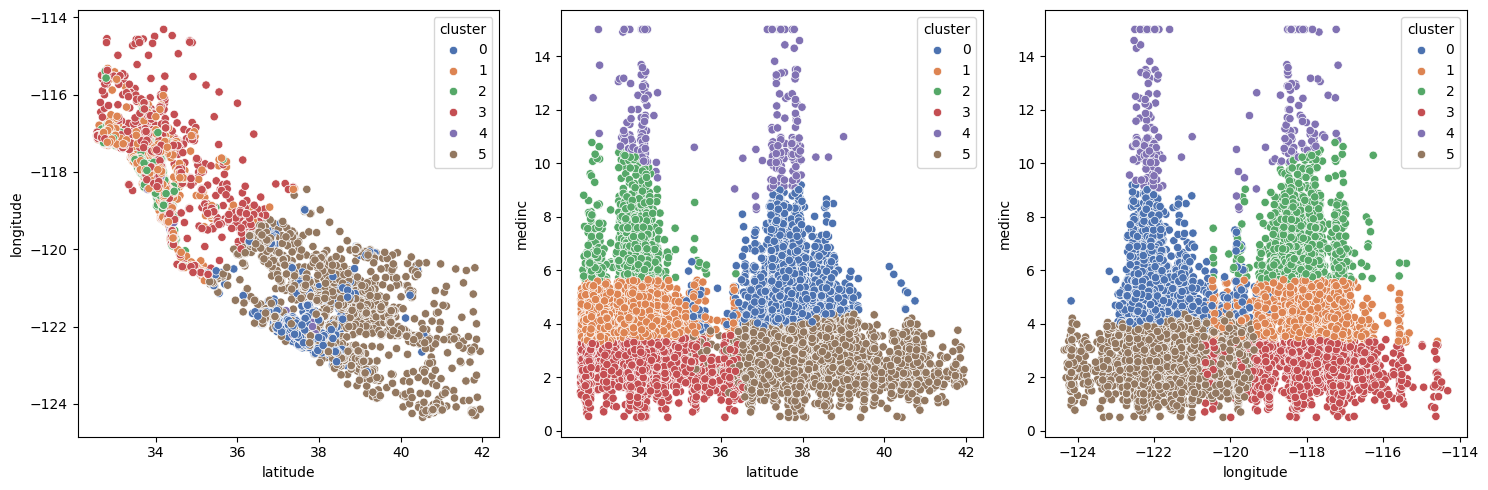

In [11]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "latitude", y = "longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "latitude", y = "medinc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "longitude", y = "medinc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

## Paso 3: Predice con el conjunto de test

In [12]:
y_test_km = list(clu_km_p.predict(X_test))
X_test["cluster"] = y_test_km
X_test.head()

,medinc,latitude,longitude,cluster
0,1.6812,36.06,-119.01,3
1,2.5313,35.14,-119.46,3
2,3.4801,37.80,-122.44,5
3,5.7376,34.28,-118.72,2
4,3.7250,36.62,-121.93,5


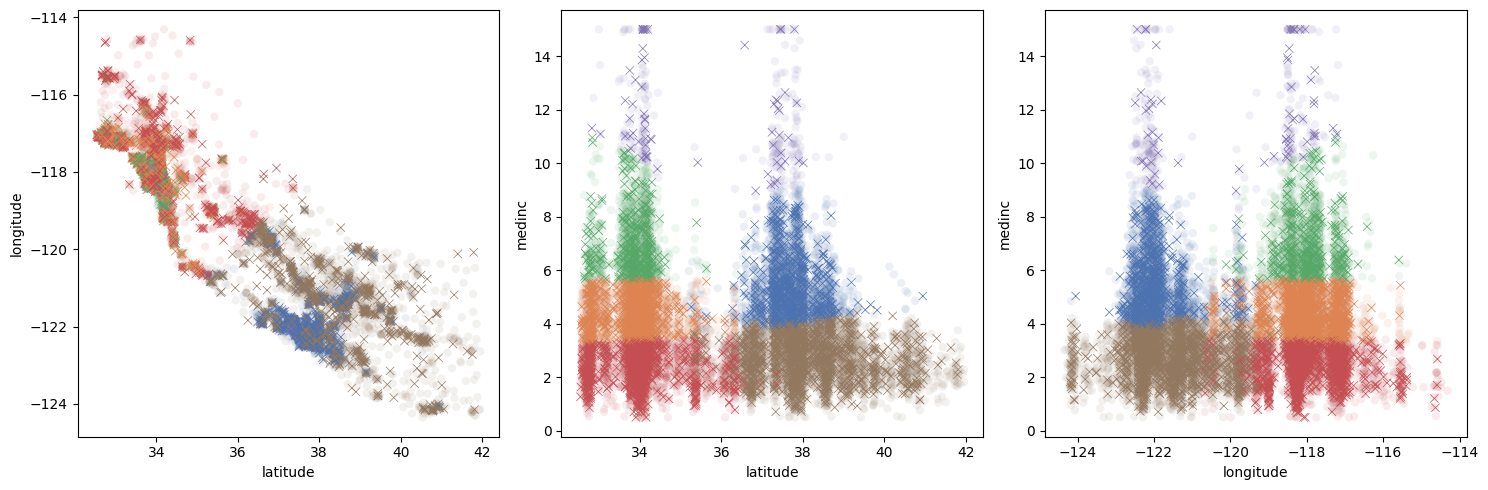

In [13]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "latitude", y = "longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "latitude", y = "medinc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "longitude", y = "medinc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "latitude", y = "longitude", hue = "cluster", palette = "deep", marker = "x")
sns.scatterplot(ax = axis[1], data = X_test, x = "latitude", y = "medinc", hue = "cluster", palette = "deep", marker = "x")
sns.scatterplot(ax = axis[2], data = X_test, x = "longitude", y = "medinc", hue = "cluster", palette = "deep", marker = "x")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

Como podemos observar en la grafica, hay una gran fiabilidad a la hora de predecir a que grupo pertenece cada punto.

## Paso 4: Entrenar un modelo de clasificación supervisado

In [15]:
clf_tree_p = Pipeline([
    ("tree", DecisionTreeClassifier(random_state=2025)),
])

In [20]:
clf_tree_p.fit(X_train, y_train_km)

Pipeline(steps=[('tree', DecisionTreeClassifier(random_state=2025))])

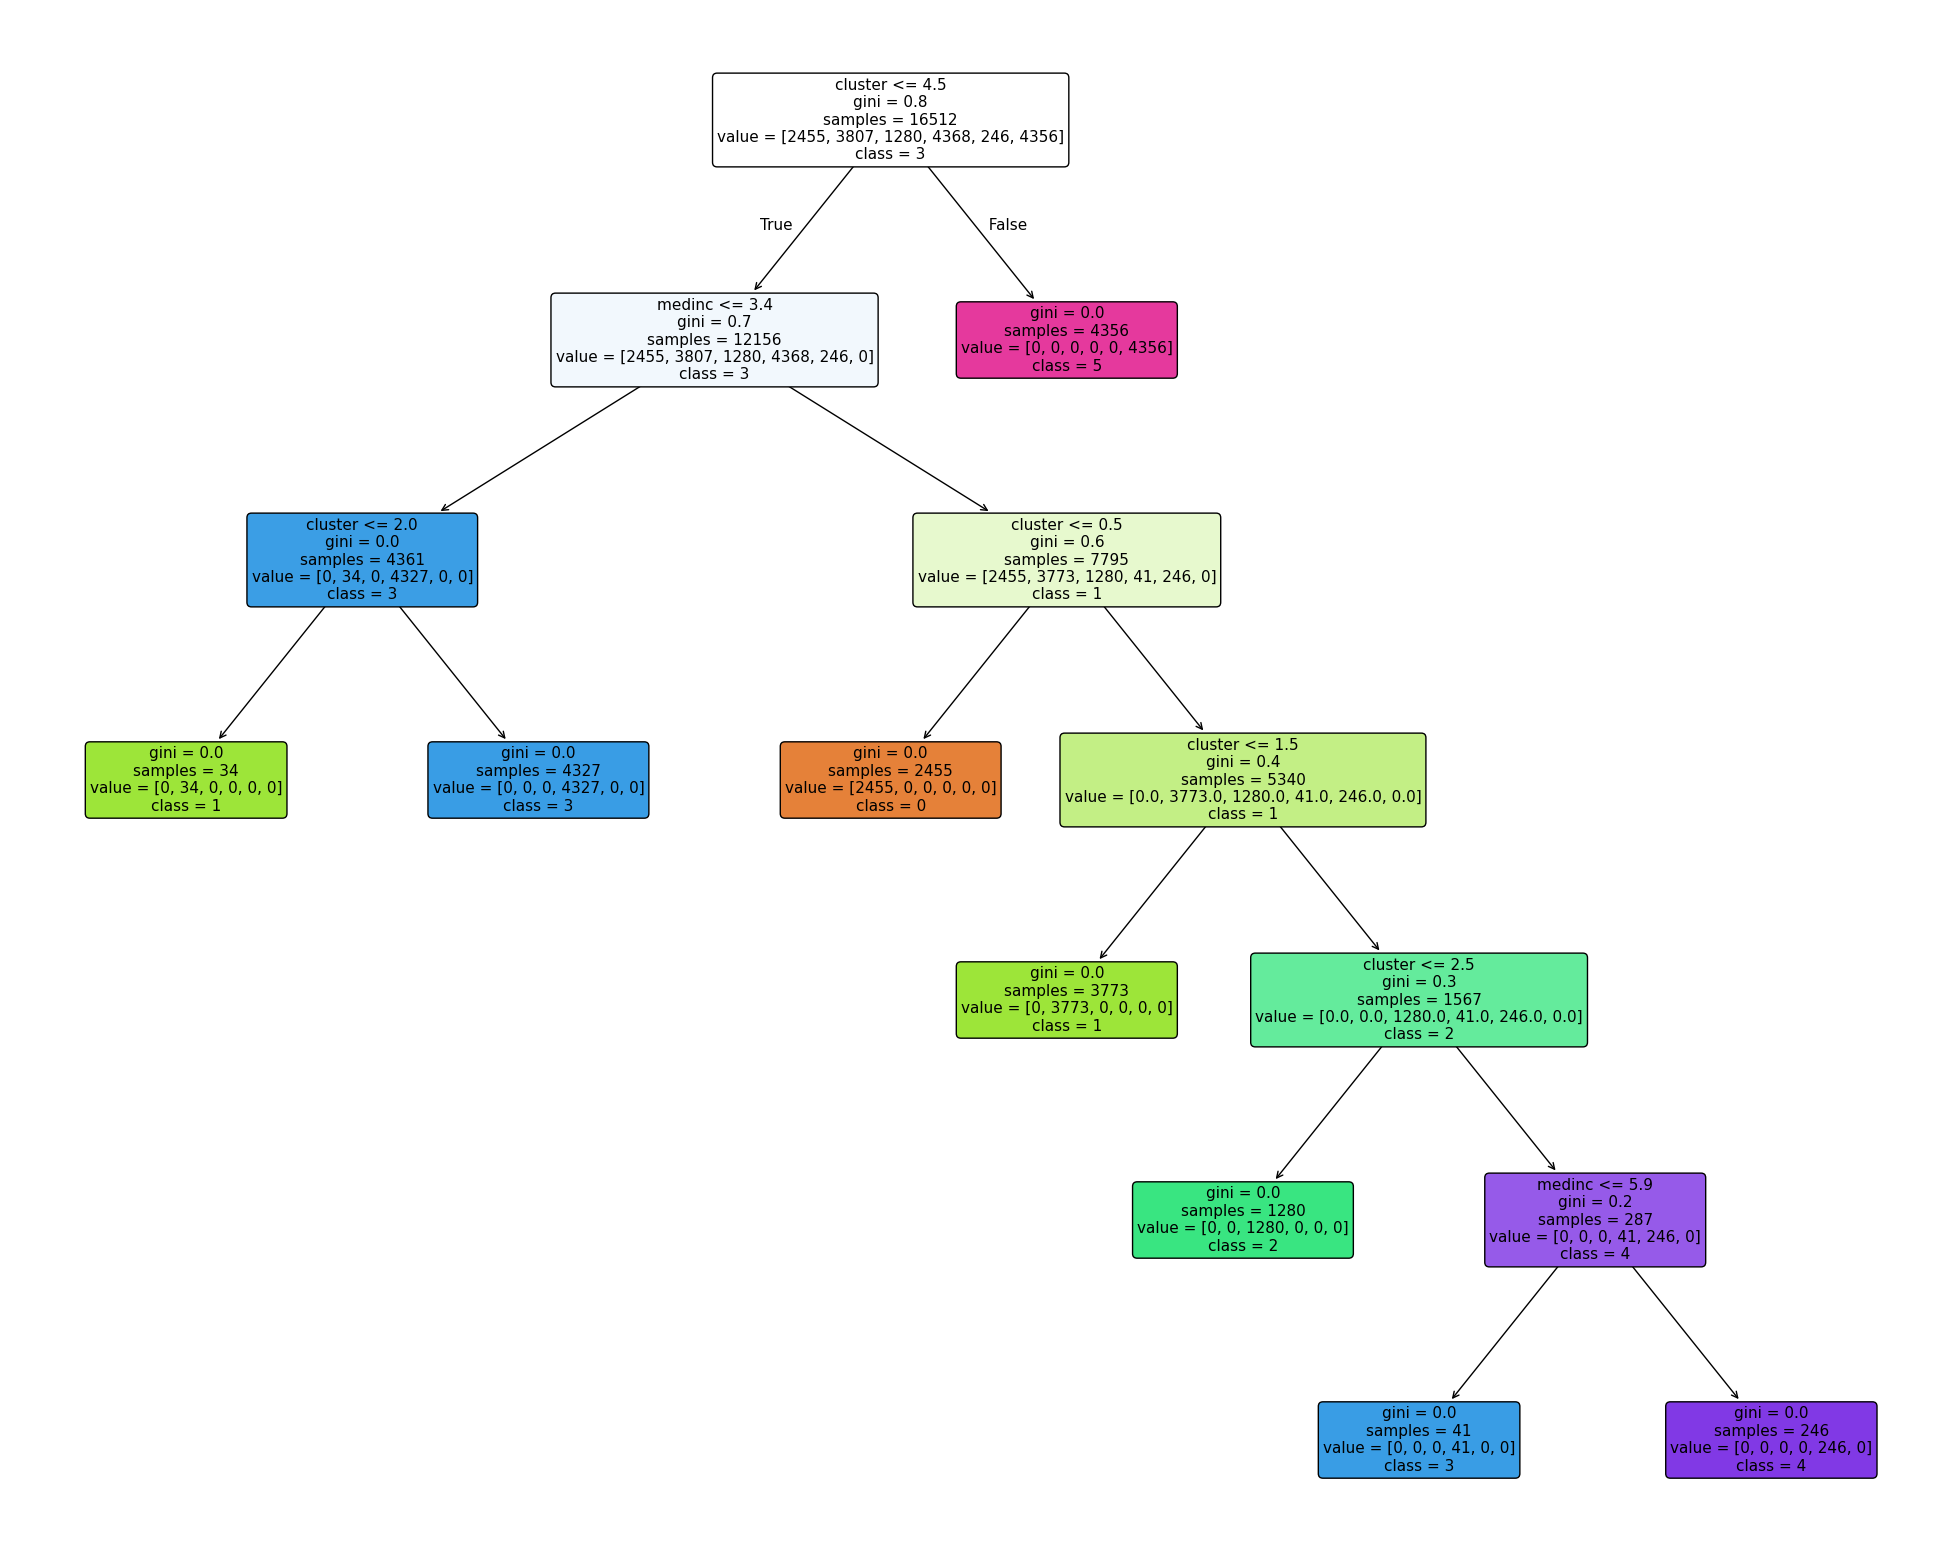

In [21]:
# Accede al árbol desde el pipeline
tree_model = clf_tree_p.named_steps["tree"]

# Crea la gráfica del árbol
plt.figure(figsize=(25, 20))
plot_tree(tree_model, 
          filled=True,
          fontsize=11,
          feature_names=X_train.columns,  # Asegúrate de que X_train es un DataFrame.
          class_names=["0", "1", "2", "3", "4", "5"],  # Ajusta si tienes más o menos clases.
          rounded=True,
          precision=1)
plt.show()

In [24]:
y_hat = clf_tree_p.predict(X_train)
print(f'accuracy: {accuracy_score(y_train_km,y_hat)*100:.2f}')

accuracy: 100.00


En este modelo observamos que con los clusters se sobreajusta el modelo, estuve probando otros algoritmos pero no encontre uno mejor